# KNN演算法
## 『近朱者赤，近墨者黑』，你的鄰居越多某種分類，就把你當成某種分類。

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# row只顯示15個和column只顯示10個
# pd.set_option('display.max_rows', 15)
# pd.set_option('display.max_columns', 10)

In [3]:
# 載入鳶尾花資料庫
iris = load_iris()
iris


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


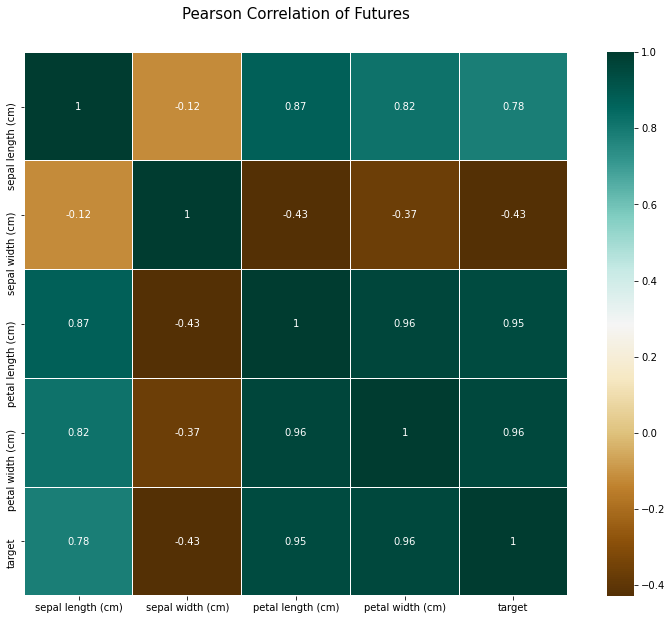

In [5]:
# 觀察heatmap
plt.figure(figsize=(14, 10))
plt.title('Pearson Correlation of Futures', y=1.05, size=15)
sns.heatmap(df.astype('float').corr(), cmap='BrBG', linewidths=0.1, square=True, linecolor='white', annot=True)

In [6]:
# 切分資料集: 訓練&測試
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(iris['data'], iris['target'], test_size=0.1)

In [7]:
# 分類器
from sklearn.neighbors import KNeighborsClassifier
# 通常在選K值的時候，是用經驗法則在選擇。
# 但一個通常的規則，不要選太少(<3)，因為無法達到多數決的效果；也不要選太多(>20)，因為這樣選出來的範圍太大，沒有找鄰居的效果。
clf = KNeighborsClassifier(n_neighbors=5) # 找K個最近的鄰居
clf = clf.fit(data_train, target_train)
clf

KNeighborsClassifier(n_neighbors=8)

In [8]:
# 開始預測
# 1. 使用classifier進行predict
# 2. predict完成以後，使用sklearn內建的accuracy_score來算出正確機率
predict = clf.predict(data_test)
print(f'預測：{predict}')
print(f'正確標籤：{target_test}')

預測：[0 2 2 1 0 1 0 1 0 2 0 1 1 0 2]
正確標籤：[0 2 2 1 0 1 0 1 0 2 0 1 1 0 2]


In [9]:
from sklearn.metrics import accuracy_score
score = accuracy_score(target_test, predict)
print(f'正確率：{score*100} %')

正確率：100.0 %


In [10]:
# 確認一下分類錯誤 → 混淆矩陣
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_test, predict)
pd.DataFrame(cm)

,0,1,2
0,6,0,0
1,0,5,0
2,0,0,4
